## Read and Plot all of the time series

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# first we load data/data_qtm_catalog.csv
df_quake = pd.read_csv("data_qtm_catalog.csv")
# calculate the time difference between each datetime to set up the dt
# convert the datetime column to datetime object
df_quake["datetime"] = pd.to_datetime(df_quake["datetime"])
dt_quake = df_quake["datetime"].diff().dt.total_seconds().fillna(0).mean()
# convert seconds to days
dt_quake = np.ceil(dt_quake / (60 * 60 * 24))
print(dt_quake)
df_quake.head()

1.0


,datetime,count
0,2008-01-01,120
1,2008-01-02,89
2,2008-01-03,146
3,2008-01-04,166
4,2008-01-05,94


In [7]:
## ICE

df_ice = pd.read_csv('../data/data_ice_jakobshavn.csv',na_values=[-1])
# calculate the time difference between each datetime to set up the dt
# convert the datetime column to datetime object
df_ice["datetime"] = pd.to_datetime(df_ice["Date"])
dt_ice = df_ice["datetime"].diff().dt.total_seconds().fillna(0).mean()
# convert seconds to days
dt_ice = np.ceil(dt_ice / (60 * 60 * 24))
print("sampling rate {} days".format(dt_ice))


sampling rate 8.0 days


In [8]:
## GPS


# read data from data_gps_P395_relateive_position.csv
fname = "../data/data_gps_P395_relative_position.csv"
df_gps = pd.read_csv(fname)
# convert dacimal year column to floats
df_gps["decimal year"] = df_gps["decimal year"].astype(float)
df_gps.head()
# take the first column "decimal year" and convert it to a datetime by taking the year before the comma, then multuply by 365.25 to get the days
df_gps["datetime"] = pd.to_datetime((df_gps["decimal year"] - 1970) * 365.25, unit='D', origin='1970-01-01')
# move the last to the first position
cols = df_gps.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_gps = df_gps[cols]
df_gps.head()



# perform a running mean average to smooth the data
for ikey in df_gps.keys()[1:]:
    df_gps[ikey]=df_gps[ikey].rolling(window=5).mean()

sta_name = fname.split("/")[-1].split("_")[2]
print(sta_name)
# the date format is in decimal years, convert it to datetime
# df["datetime"] = pd.to_datetime(df["decimal year"], format="%Y.%j")
# df.head()

P395


In [9]:
# read one dv/v file
fname = "../data/DVV_data_withMean/Data_BGU.csv"
df_dvv = pd.read_csv(fname)
sta_name = fname.split("/")[-1].split("_")[1]
# convert the date into a timestamp
df_dvv["datetime"] = pd.to_datetime(df_dvv["date"])
# move datetime to the first position
cols = df_dvv.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_dvv = df_dvv[cols]
df_dvv.head()

,datetime,date,dv,temp,sm_ewt,lp_lake,lake
0,2007-02-03,2007-02-03,-0.1144,-1.9490,0.4645,0.2920,1370.9875
1,2007-02-04,2007-02-04,-0.1211,-1.9249,0.4647,0.2930,1370.9906
2,2007-02-05,2007-02-05,-0.1260,-1.8253,0.4648,0.2939,1370.9936
3,2007-02-06,2007-02-06,-0.1276,-1.5767,0.4649,0.2949,1370.9969
4,2007-02-07,2007-02-07,-0.1357,-1.3691,0.4651,0.2958,1371.0000


In [10]:
## C02
import re


# read data from data_co2.csv
input_file = "data_co2.csv"
output_file = "cleaned_data_co2.csv"
#read the data but ignore the commented rows and add separator as space
# Read the data, ignoring commented rows and using space as the separator

with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        # Strip leading spaces
        cleaned_line = line.lstrip()
        cleaned_line = line.rstrip()
        # if it starts with a #, skip it
        if cleaned_line.startswith("#"):
            continue
        # split the line by space
        cleaned_line = re.split(r'\s+', cleaned_line)

        # remove first element if it is empty
        if cleaned_line[0] == '':
            cleaned_line = cleaned_line[1:]

        # convert all elements to floats, except if the line starts with 'year'ArithmeticError
        if cleaned_line[0] != 'year':
            cleaned_line = [float(x) for x in cleaned_line]

        # print all cleaned lines to a CSV file
        outfile.write(','.join(map(str, cleaned_line)) + '\n')


# read one dv/v file
fname = output_file
df_co2 = pd.read_csv(fname)
# # convert the date into a timestamp
# create a datetime column by taking the decimal year and converting it to days even if it starts before 1970

from datetime import datetime, timedelta

# Function to convert decimal year to datetime
def decimal_year_to_datetime(decimal_year):
    year = int(decimal_year)
    remainder = decimal_year - year
    start_of_year = datetime(year, 1, 1)
    days_in_year = (datetime(year + 1, 1, 1) - start_of_year).days
    return start_of_year + timedelta(days=remainder * days_in_year)

# Apply the function to the 'decimale-date' column
df_co2["datetime"] = df_co2["decimale-date"].apply(decimal_year_to_datetime)


# df_co2["datetime"] = pd.to_datetime((df_co2["decimale-date"] - 1970) * 365.25, origin='1970-01-01', unit='D')
df_co2.head()
# # move datetime to the first position
cols = df_co2.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_co2 = df_co2[cols]
df_co2.head()

,datetime,year,month,decimale-date,monthly-average,de-seasonalized,no-days,std-of-days,unc-of-month-mean
0,1958-03-15 23:39:07.200002,1958.0,3.0,1958.2027,315.71,314.44,-1.0,-9.99,-0.99
1,1958-04-16 00:15:07.200003,1958.0,4.0,1958.2877,317.45,315.16,-1.0,-9.99,-0.99
2,1958-05-16 00:19:26.399997,1958.0,5.0,1958.3699,317.51,314.69,-1.0,-9.99,-0.99
3,1958-06-16 00:02:52.799999,1958.0,6.0,1958.4548,317.27,315.15,-1.0,-9.99,-0.99
4,1958-07-16 00:07:12.000001,1958.0,7.0,1958.5370,315.87,315.20,-1.0,-9.99,-0.99


,datetime,time,Z,N,E
0,1970-01-01 00:00:00.000,0.0,20525.021459,-19224.056196,-47203.488344
1,1970-01-01 00:00:00.200,0.2,-7242.363758,4543.589720,14463.495052
2,1970-01-01 00:00:00.400,0.4,-1562.630597,5935.755557,-9257.204055
3,1970-01-01 00:00:00.600,0.6,-907.924879,-4912.978439,3321.988412
4,1970-01-01 00:00:00.800,0.8,-432.534303,1306.775470,-9014.431029


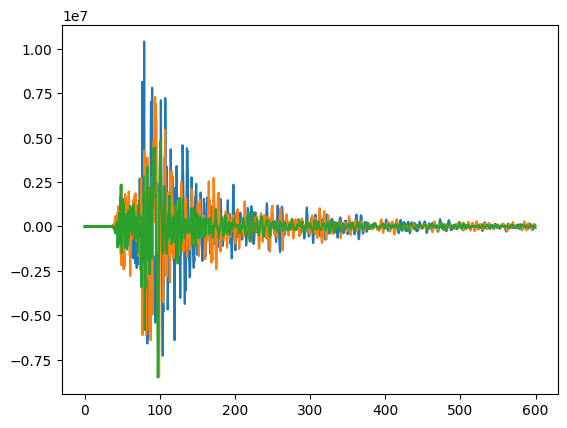

In [11]:
# read CSV file with waveforms in them
df_wav = pd.read_csv("../data/data_waveforms.csv")


# trim data between 100 and 200 rows
# df_wav = df_wav.iloc[300:400]
plt.plot(df_wav['time'],df_wav['Z'])
plt.plot(df_wav['time'],df_wav['N'])
plt.plot(df_wav['time'],df_wav['E'])
#make a datetime column
df_wav["datetime"] = pd.to_datetime(df_wav["time"], unit='s')
cols = df_wav.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_wav = df_wav[cols]

df_wav.head()

In [12]:
df_ice.head()

,Date,"Pixel Value (x=2500, y=8200)","Pixel Value (x=2500, y=8201)","Pixel Value (x=2500, y=8202)","Pixel Value (x=2500, y=8203)","Pixel Value (x=2500, y=8204)","Pixel Value (x=2500, y=8205)","Pixel Value (x=2500, y=8206)","Pixel Value (x=2500, y=8207)","Pixel Value (x=2500, y=8208)",...,"Pixel Value (x=2509, y=8201)","Pixel Value (x=2509, y=8202)","Pixel Value (x=2509, y=8203)","Pixel Value (x=2509, y=8204)","Pixel Value (x=2509, y=8205)","Pixel Value (x=2509, y=8206)","Pixel Value (x=2509, y=8207)","Pixel Value (x=2509, y=8208)","Pixel Value (x=2509, y=8209)",datetime
0,2015-01-01,2690.5570,2682.3616,2658.6174,2606.9355,2530.3400,2432.4604,2337.5603,2238.3130,2131.6187,...,1860.1473,1811.2555,1772.2811,1739.5938,1691.1827,1651.6400,1610.4110,1563.1417,1513.4183,2015-01-01
1,2015-01-13,2714.7678,2694.3774,2657.5322,2604.6094,2541.0916,2492.7390,2451.3862,2415.7693,2235.5337,...,1866.2997,1801.4703,1747.1519,1679.1748,1619.7880,1580.2765,1548.2367,1506.4203,1471.4894,2015-01-13
2,2015-01-25,2712.4210,2724.5880,2735.8308,2645.3513,2518.3074,2460.4731,2262.7056,2141.2844,2034.8848,...,1807.4071,1738.1703,1679.8862,1627.8777,1575.1526,1554.8282,1534.6147,1520.7195,1515.0082,2015-01-25
3,2015-02-06,NaN,NaN,NaN,NaN,2428.0410,2308.0483,2250.8723,2212.7468,2080.9092,...,1914.6561,1867.8999,1821.8802,1757.2567,1673.6622,1596.8252,1527.3679,1468.2152,1424.4463,2015-02-06
4,2015-02-18,2641.4170,2613.6772,2577.1538,2528.2330,2444.6372,2356.7375,2280.1716,2216.3354,2187.7751,...,1803.6461,1748.5105,1696.6669,1643.1813,1591.3317,1547.9862,1504.9419,1459.6843,1411.1000,2015-02-18


In [13]:
## read benthic data
# read the csv file, ignore the comments and use space as separator
input_file = "lr04.csv"
output_file = "cleaned_lr04.csv"
with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        # Strip leading spaces
        cleaned_line = line.lstrip()
        cleaned_line = line.rstrip()
        # if it starts with a #, skip it
        if cleaned_line.startswith("#"):
            continue
        # split the line by space
        cleaned_line = re.split(r'\s+', cleaned_line)

        # # remove first element if it is empty
        # if cleaned_line[0] == '':
        #     cleaned_line = cleaned_line[1:]

        # # convert all elements to floats, except if the line starts with 'age'
        # if cleaned_line[0] != 'age':
        #     cleaned_line = [float(x) for x in cleaned_line]

        # print all cleaned lines to a CSV file
        outfile.write(','.join(map(str, cleaned_line)) + '\n')

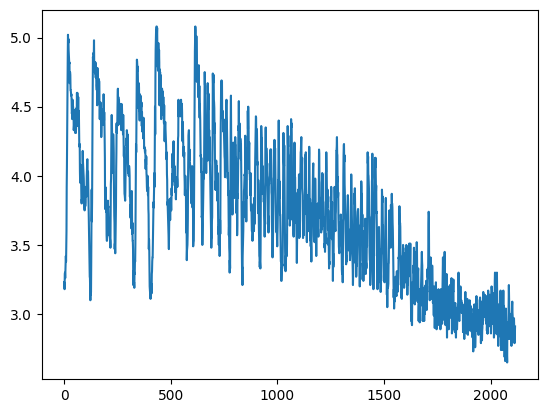

In [14]:
# read the cleaned file and plot the data
df_benthic = pd.read_csv(output_file)
plt.plot(df_benthic['Benthic-d18O-(per-mil)'])

In [15]:
Lmax = max(len(df_ice),len(df_quake),len(df_gps),len(df_dvv),len(df_co2),len(df_wav))
t = np.arange(0,Lmax)/Lmax

In [16]:
df_co2

,datetime,year,month,decimale-date,monthly-average,de-seasonalized,no-days,std-of-days,unc-of-month-mean
0,1958-03-15 23:39:07.200002,1958.0,3.0,1958.2027,315.71,314.44,-1.0,-9.99,-0.99
1,1958-04-16 00:15:07.200003,1958.0,4.0,1958.2877,317.45,315.16,-1.0,-9.99,-0.99
2,1958-05-16 00:19:26.399997,1958.0,5.0,1958.3699,317.51,314.69,-1.0,-9.99,-0.99
3,1958-06-16 00:02:52.799999,1958.0,6.0,1958.4548,317.27,315.15,-1.0,-9.99,-0.99
4,1958-07-16 00:07:12.000001,1958.0,7.0,1958.5370,315.87,315.20,-1.0,-9.99,-0.99
...,...,...,...,...,...,...,...,...,...
793,2024-04-16 18:17:34.080000,2024.0,4.0,2024.2917,426.51,423.99,22.0,0.99,0.40
794,2024-05-17 06:00:00.000000,2024.0,5.0,2024.3750,426.90,423.62,29.0,0.76,0.27
795,2024-06-16 17:42:25.920000,2024.0,6.0,2024.4583,426.91,424.45,20.0,0.65,0.28
796,2024-07-17 06:17:34.080000,2024.0,7.0,2024.5417,425.55,425.07,24.0,0.69,0.27


Index(['datetime', 'date', 'dv', 'temp', 'sm_ewt', 'lp_lake', 'lake'], dtype='object')


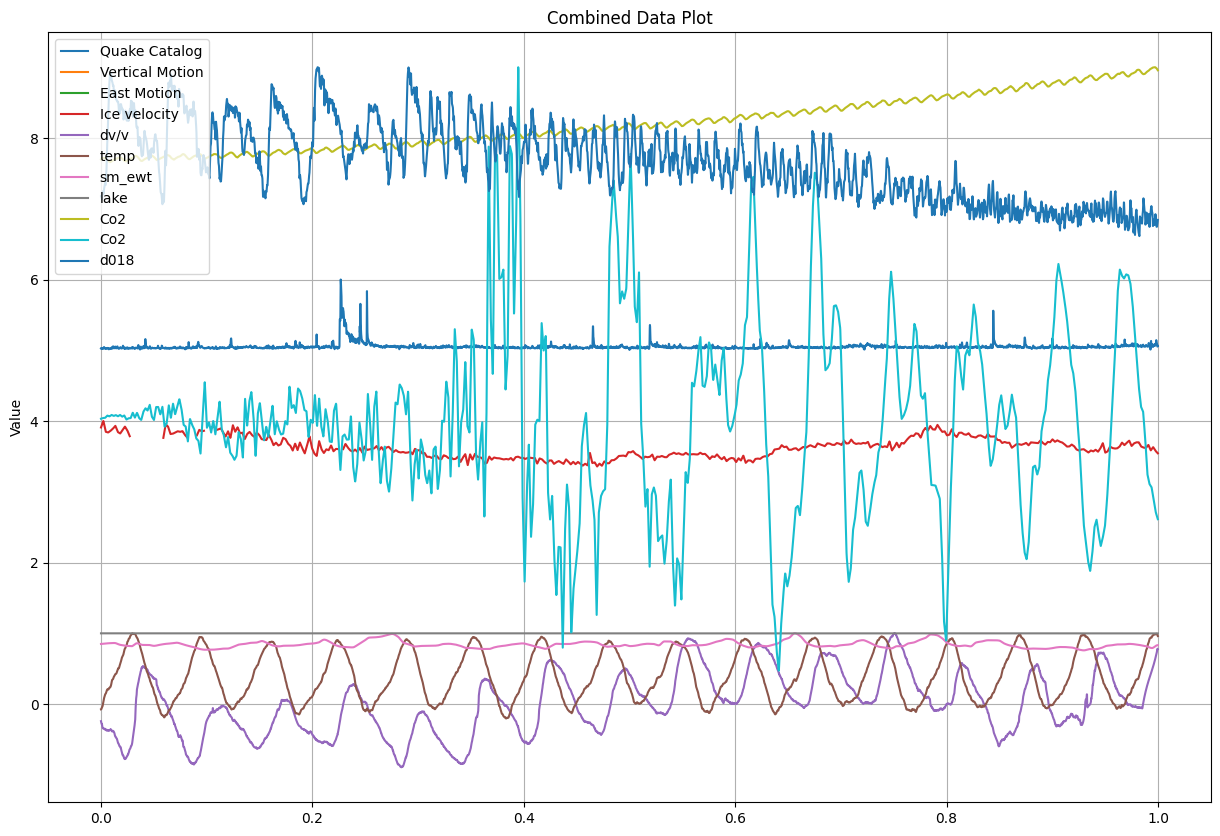

In [17]:
## PLOT ALL DATA INTO A SINGLE PLOT

import scipy.interpolate as sp
import matplotlib.pyplot as plt

# Assuming you have a list of DataFrames
dataframes = [df_quake, df_ice, df_gps, df_dvv ,df_co2, df_wav, df_benthic] # Replace with your actual DataFrames
labels = ['Quake Catalog', 'Ice Velocity', 'GPS', 'Dv/v', 'CO2','wave', 'd018']  # Replace with your actual labels

plt.figure(figsize=(15, 10))

# mega_df = ppd.concat(dataframes, axis=1)

mega_df = pd.DataFrame()
# Interpolate the Quake data
x = df_quake.index.astype('int64')  # Convert datetime index to seconds since epoch
x/=max(x)
y = df_quake['count']  # Replace 'value' with the actual column name
interp_func = sp.interp1d(x, y, kind='linear', fill_value="extrapolate")
# Create a common time axis for interpolation
interpolated_data = interp_func(t)
plt.plot(t, interpolated_data/max(interpolated_data)+5, label='Quake Catalog')  # Replace 'value' with the actual column name

mega_df["quake_count"] = interpolated_data

# Interpolate the GPS data
x = df_gps.index.astype('int64')  # Convert datetime index to seconds since epoch
x/=max(x)
y = df_gps["new delta v (m)"]  # Replace 'value' with the actual column name
interp_func = sp.interp1d(x, y, kind='linear', fill_value="extrapolate")
# Create a common time axis for interpolation
interpolated_data = interp_func(t)

mega_df["gps_v"] = interpolated_data

plt.plot(t, interpolated_data/max(interpolated_data)/10+1, label='Vertical Motion')  # Replace 'value' with the actual column name
y = df_gps["new delta e (m)"]  # Replace 'value' with the actual column name
interp_func = sp.interp1d(x, y, kind='linear', fill_value="extrapolate")
# Create a common time axis for interpolation
interpolated_data = interp_func(t)
plt.plot(t, interpolated_data/max(abs(interpolated_data))/4+1.5, label='East Motion')  # Replace 'value' with the actual column name


mega_df["gps_e"] = interpolated_data

x = df_ice.index.astype('int64')  # Convert datetime index to seconds since epoch
x/=max(x)
y = df_ice["Pixel Value (x=2500, y=8206)"]  # Replace 'value' with the actual column name
interp_func = sp.interp1d(x, y, kind='linear', fill_value="extrapolate")
# Create a common time axis for interpolation
interpolated_data = interp_func(t)
plt.plot(t, interpolated_data/max(interpolated_data)*2+2, label='Ice velocity')  # Replace 'value' with the actual column name


mega_df["ice"] = interpolated_data

print(df_dvv.keys())
x = df_dvv.index.astype('int64')  # Convert datetime index to seconds since epoch
x/=max(x)
y = df_dvv["dv"]  # Replace 'value' with the actual column name
interp_func = sp.interp1d(x, y, kind='linear', fill_value="extrapolate")
# Create a common time axis for interpolation
interpolated_data = interp_func(t)
plt.plot(t, interpolated_data/max(interpolated_data), label='dv/v')  # Replace 'value' with the actual column name

mega_df["dvv"] = interpolated_data

y = df_dvv["temp"]  # Replace 'value' with the actual column name
interp_func = sp.interp1d(x, y, kind='linear', fill_value="extrapolate")
# Create a common time axis for interpolation
interpolated_data = interp_func(t)
plt.plot(t, interpolated_data/max(interpolated_data), label='temp')  # Replace 'value' with the actual column name

mega_df["temp"] = interpolated_data


y = df_dvv["sm_ewt"]  # Replace 'value' with the actual column name
interp_func = sp.interp1d(x, y, kind='linear', fill_value="extrapolate")
# Create a common time axis for interpolation
interpolated_data = interp_func(t)
plt.plot(t, interpolated_data/max(interpolated_data), label='sm_ewt')  # Replace 'value' with the actual column name

mega_df["sm_ewt"] = interpolated_data

y = df_dvv["lake"]  # Replace 'value' with the actual column name
interp_func = sp.interp1d(x, y, kind='linear', fill_value="extrapolate")
# Create a common time axis for interpolation
interpolated_data = interp_func(t)
plt.plot(t, interpolated_data/max(interpolated_data), label='lake')  # Replace 'value' with the actual column name



x = df_co2.index.astype('int64')  # Convert datetime index to seconds since epoch
x/=max(x)
y = df_co2["monthly-average"]  # Replace 'value' with the actual column name
interp_func = sp.interp1d(x, y, kind='linear', fill_value="extrapolate")
# Create a common time axis for interpolation
interpolated_data = interp_func(t)
plt.plot(t, interpolated_data/max(interpolated_data)*5+4, label='Co2')  # Replace 'value' with the actual column name

mega_df["co2"] = interpolated_data



istart=200
iend=700
x = df_wav.index.astype('int64')[istart:iend]  # Convert datetime index to seconds since epoch
x-=min(x)
x/=max(x)
y = df_wav["Z"][istart:iend]  # Replace 'value' with the actual column name
interp_func = sp.interp1d(x, y, kind='linear', fill_value="extrapolate")
# Create a common time axis for interpolation
interpolated_data = interp_func(t)
plt.plot(t, interpolated_data/max(interpolated_data)*5+4, label='Co2')  # Replace 'value' with the actual column name

mega_df["wave_z"] = interpolated_data




x = df_benthic.index.astype('int64')  # Convert datetime index to seconds since epoch
x/=max(x)
y = df_benthic["Benthic-d18O-(per-mil)"]  # Replace 'value' with the actual column name
interp_func = sp.interp1d(x, y, kind='linear', fill_value="extrapolate")
# Create a common time axis for interpolation
interpolated_data = interp_func(t)
plt.plot(t, interpolated_data/max(interpolated_data)*5+4, label='d018')  # Replace 'value' with the actual column name

mega_df["d018"] = interpolated_data



plt.ylabel('Value')
plt.title('Combined Data Plot')
plt.legend()
plt.grid(True)
plt.show()




In [18]:
# Define the desired order of columns
desired_order = ['gps_e', 'gps_v', 'dvv', 'temp', 'sm_ewt', 'ice', 'd018', 'co2', 'wave_z', 'quake_count']

# Reorder the columns of the DataFrame
mega_df = mega_df[desired_order]

# Verify the new order of columns
print(mega_df.columns)

Index(['gps_e', 'gps_v', 'dvv', 'temp', 'sm_ewt', 'ice', 'd018', 'co2',
       'wave_z', 'quake_count'],
      dtype='object')


/tmp/ipykernel_2099871/635685998.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c_map = get_cmap('Set3')


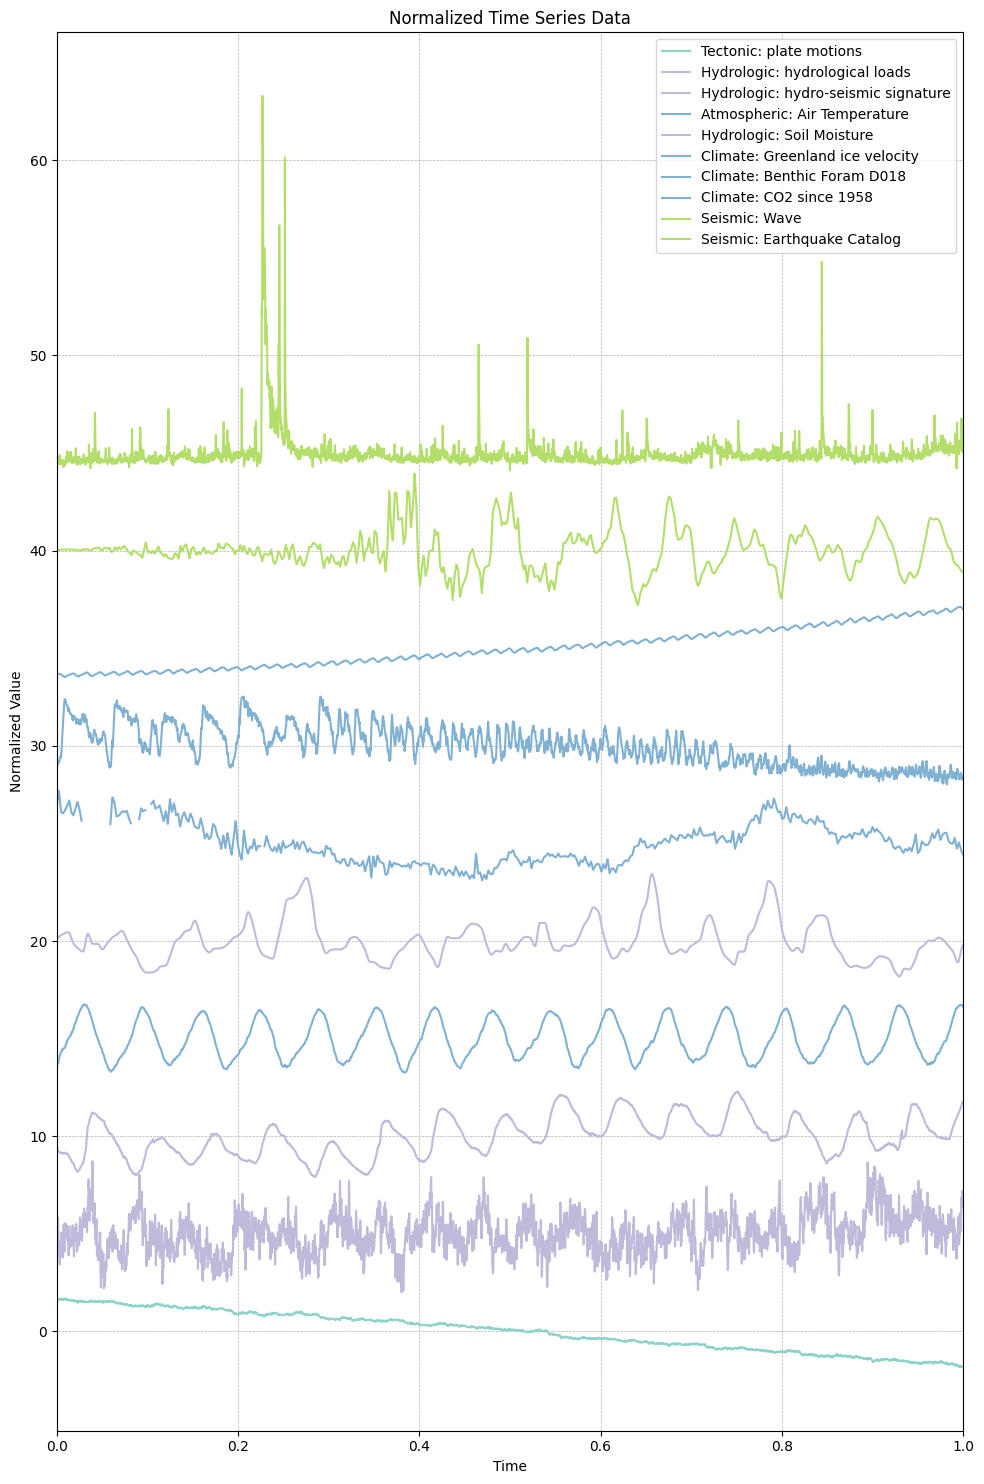

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap


# Set the font style and size
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'sans-serif',
    'font.serif': ['DejaVu Sans'],
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10
})

# Colorblind-friendly color scheme
# colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']


# ['gps_e', 'gps_v', 'dvv', 'temp', 'sm_ewt', 'ice', 'd018', 'co2',  'wave_z', 'quake_count']
# tectonic, hydrologic, cryo & climate, seismic.

c_map = get_cmap('Set3')
# Number of colors in the colormap
num_colors = c_map.N

# Generate a list of all colors in the colormap
c1 = c_map(np.linspace(0, 2, num_colors+1))

colors = [c1[0], c1[1], c1[1], c1[2], c1[1],c1[2],c1[2],c1[2], c1[3],c1[3]]
labels =['Tectonic: plate motions', "Hydrologic: hydrological loads", "Hydrologic: hydro-seismic signature","Atmospheric: Air Temperature",
         "Hydrologic: Soil Moisture", "Climate: Greenland ice velocity", "Climate: Benthic Foram D018", "Climate: CO2 since 1958", "Seismic: Wave", "Seismic: Earthquake Catalog"]

# Make a nice plot with all keys of mega_df
fig, ax = plt.subplots(figsize=(10, 15))

for ik, key in enumerate(mega_df.keys()):
    # standard scale the data
    data = mega_df[key] - np.mean(mega_df[key])
    data = data / np.std(data)
    # Plot all keys, normalize the data to the max value, offset the data by iteration over the keys
    ax.plot(t, data+ 5 * ik, label=labels[ik], color=colors[ik % len(colors)], linewidth=1.5)

# Add grid
ax.grid(True, linestyle='--', linewidth=0.5)

# Add legend
ax.legend(loc='upper right', fontsize='small')

# limit xlim to 0 and 1
ax.set_xlim([0,1])

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Normalized Value')
ax.set_title('Normalized Time Series Data')

# Show plot
plt.tight_layout()
plt.show()
plt.savefig("all_data.png")
plt.savefig("all_data.svg")